In [19]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import random


In [41]:
#Returns an array of stock values (a path) that have been evolved via euler stepping and geo bro mo
def get_euler_path(T, r,d, S0,sigma,steps):
    S_current = S0
    for i in range (0,T):
        dt = float(T/steps)
        Bt = [0]+ np.random.standard_normal(size=steps)
        Bt = np.cumsum(Bt)*np.sqrt(dt)
        path = S_current+ r*S_current*dt + S_current*sigma*np.sqrt(dt)*Bt
        i=i+1
    plt.plot(path)
    return path

def get_final_S():
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=1) #input parameters here
        S = path[-1]
        return S

#List that stores N final prices with N paths
def list_of_final_S():
    list_of_final_S = []
    N=1000
    for i in range(0,N):
        S = get_final_S()
        list_of_final_S.append(S)
    return list_of_final_S


#Forward payoffs
def list_forward_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=110
    for i in range (0,len(S_list)):
        S = S_list[i]
        payoff_list.append(S-K)
    return payoff_list 

#list of call payoffs for N euler step paths
def list_call_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=105
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S>K:
            payoff_list.append(S-K)
        else:
            payoff_list.append(0)
    return payoff_list 

#list of put payoffs for N euler step paths
def list_put_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=230
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S<K:
            payoff_list.append(K-S)
        else:
            payoff_list.append(0)
    return payoff_list

#list of dig call payoffs for N euler step paths
def list_dig_call_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=110
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S>K:
            payoff_list.append(1)
        else:
            payoff_list.append(0)
    return payoff_list

#list of dig put payoffs for N euler step paths
def list_dig_put_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=100
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S<K:
            payoff_list.append(1)
        else:
            payoff_list.append(0)
    return payoff_list

#MC of payoffs for final price
def mc():
    r=0
    T=2
    payoff_list = list_call_payoffs() #can change payoff to any instrument payoff function (i.e. put, dig call, etc)
    mc_price = np.mean(payoff_list)*np.exp(-r*T)
    return mc_price





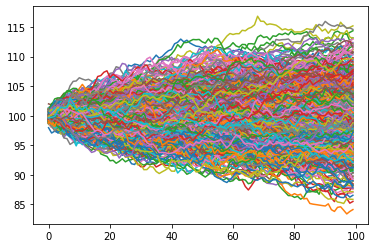

In [45]:
#graphing brownian motion

for N in range (0,1000):
    get_euler_path(T=1, r=0,d=0, S0=100,sigma=0.5,steps=100)

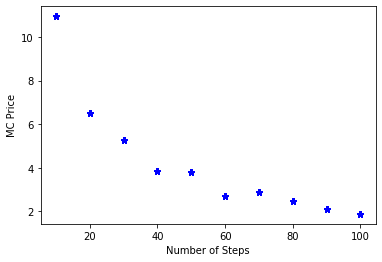

In [23]:
#Graph step versus mc price (in this case call) to see converging on specific value
for q in range(0,len(payoff_list)):
    x1=[10,20,30,40,50,60,70,80,90,100]
    y1= [10.947041439649452,6.509013603116706,5.290920109276793,3.8398334760674087,3.7889070081481466,2.730658794133521,2.893903775530683,2.4936618437687854,2.123840825415333,1.887924033382414]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Number of Steps')
plt.ylabel('MC Price')
plt.show()

Price at 500 steps 13.20469867450005 Price at 1000 steps 12.377763674767843


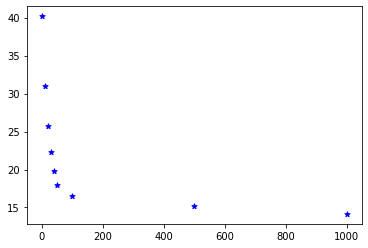

In [17]:
#graph of final price as a function of steps showing convergence less naive way

def get_euler_path(T, r,d, S0,sigma,steps):
    S_current = S0
    for i in range (0,T):
        dt = float(T/steps)
        Bt = [0]+ np.random.standard_normal(size=steps)
        Bt = np.cumsum(Bt)*np.sqrt(dt)
        path = S_current+ r*S_current*dt + S_current*sigma*np.sqrt(dt)*Bt
        i=i+1
    return path
N=10000 #number of paths

K=100 
S_list=[]
payoff_list=[]
T=2
r=0 #change also on line 19

def get_1step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=1) #input parameters here
        S = path[-1]
        S_list.append(S)
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price1 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price1)

def get_10step_price():
    for i in range (1,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=10) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price10 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price10)

def get_20step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=20) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price20 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price20)

def get_30step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=30) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price30 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price30)

def get_40step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=40) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price40 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price40)

def get_50step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=50) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price50 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price50)

def get_100step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=100) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price100 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price100)

def get_500step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=500) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price500 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price500)

def get_1000step_price():
    for i in range (0,N): #number of steps
        path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=1000) #input parameters here
        S = path[-1]
        S_list.append(S)
        
    for j in range (0,len(S_list)):
        if S_list[j] > K:
            payoff_list.append(S_list[j]-K)
        else:
            payoff_list.append(0)
    mc_price1000 = np.mean(payoff_list)*np.exp(-r*T)
    return(mc_price1000)



x = (1,10,20,30,40,50,100,500,1000)
y = (get_1step_price(),get_10step_price(),get_20step_price(),get_30step_price(),get_40step_price(),get_50step_price(), get_100step_price(),get_500step_price(),get_1000step_price())
   
plt.scatter(x,y, label = "stars", color= "blue", marker = "*", s = 30)
print("Price at 500 steps", get_500step_price(), "Price at 1000 steps", get_1000step_price())








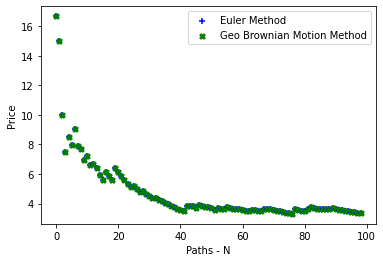

Euler Method - price with respect to paths


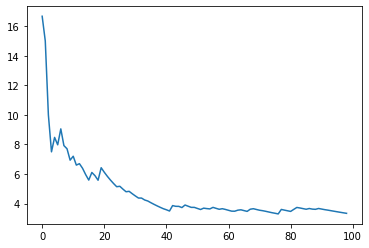

Geo brownian motion method - price with respect to paths


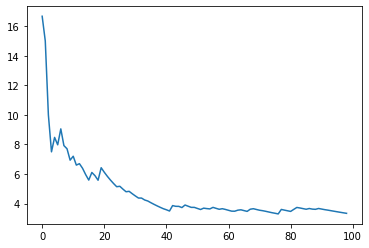

Both methods need at least 30 paths to start stabalising within $1


In [40]:
#see graph for convgerence of price with 2 methods and show the two MC methods give same price

final_S=[]
payoff_list=[]
K=100 #strike
r=0
T=2

# MC WITH EULER
for N in range(0,100):
    def get_euler_path(T, r,d, S0,sigma,steps):
        S_current = S0
        for i in range (0,T):
            dt = float(T/steps)
            Bt = [0]+ np.random.standard_normal(size=steps)
            Bt = np.cumsum(Bt)*np.sqrt(dt)
            path = S_current+ r*S_current*dt + S_current*sigma*np.sqrt(dt)*Bt
            i=i+1
        return path

    def get_final_S():
            path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=100) #input parameters here
#             print (path)
            S = path[-1]
            return S
    S= get_final_S()
    final_S.append(S)
    

for i in range (0,len(final_S)):
    St = final_S[i]
    if St>K:
        payoff_list.append(St-K)
    else:
        payoff_list.append(0)
        
# print (path)
# print('S list', final_S)
# print('payoff', payoff_list)
intermediate_list=[]
y1_list=[] # price of euler mc method depending on number of paths N

for q in range(0,N):
    intermediate_list.append(payoff_list[q])
    y1_list.append(np.mean(intermediate_list)*np.exp(-r*T))


x1_list=[]
for l in range(0,len(y1_list)):
    x1_list.append(l)
    
# MC WITH geo bro mo
for N in range(0,100):
    def get_geo_path(T,r,d,sigma, S0,steps):
        dt= T/steps
        t = np.linspace(0,T,steps)
        Bt = [0]+ np.random.standard_normal(size=steps)
        Bt = np.cumsum(Bt)*np.sqrt(dt)
        path = S0*np.exp(((r-d)-0.5*sigma**2)*t+sigma*Bt)
        plt.plot(t,path)
        return path3

    def get_final_S():
            path = get_euler_path(T=2,r=0,d=0,sigma=0.5, S0=100,steps=100) #input parameters here
#             print (path)
            S = path[-1]
            return S
    S= get_final_S()
    final_S.append(S)
    

for i in range (0,len(final_S)):
    St = final_S[i]
    if St>K:
        payoff_list.append(St-K)
    else:
        payoff_list.append(0)
        
# print (path)
# print('S list', final_S)
# print('payoff', payoff_list)
intermediate_list=[]
y2_list=[] # price of geo bro mo mc method depending on number of paths N

for q in range(0,N):
    intermediate_list.append(payoff_list[q])
    y2_list.append(np.mean(intermediate_list)*np.exp(-r*T))


for g in range(0,len(y1_list)):
    x1=[x1_list[g]]
    y1= [y1_list[g]]
    y2= y2_list[g]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "+", s = 30)
    plt.scatter(x1,y2, label = "stars", color= "green", marker = "X", s = 30)
plt.xlabel( 'Paths - N')
plt.ylabel('Price')
plt.legend(['Euler Method','Geo Brownian Motion Method'])
plt.show()   
#seperate graphs
print('Euler Method - price with respect to paths')
plt.plot(x1_list,y1_list)
plt.show()
print('Geo brownian motion method - price with respect to paths')
plt.plot(x1_list,y2_list)
plt.show()


print("Both methods need at least 30 paths to start stabalising within $1")


